In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.exc import OperationalError, ProgrammingError
import re
import matplotlib.pyplot as plt

In [2]:
def parse_salary(salary_str):
    if pd.isna(salary_str):
        return None
    
    # Remove non-numeric characters except for commas, periods, space, and ´'
    salary_str = re.sub(r"[^\d´'., ]", 'splitter', salary_str)
    salary_items_list = salary_str.split('splitter')
    list_parsed_values = []
    for salary_item in salary_items_list:
        salary_item = salary_item.strip(" .,")
        if salary_item.count('.') <= 2 and salary_item.count(',') <= 1 and len(salary_item) < 10:
            salary_item = re.sub(r'[^\d.,]', '', salary_item)
            salary_item = salary_item.replace('.', '').replace(',', '.')
            if salary_item != '':
                salary_item = '82500.0' if salary_item == '8085000' else salary_item  # Hard corded this specifc record
                numeric_value = int(float(salary_item))
                if len(str(numeric_value)) <= 3 and numeric_value != 0:
                    list_parsed_values.append(numeric_value * 1000)
                else:
                    list_parsed_values.append(numeric_value)
                    
        else:
            if ' ' in salary_item:
                salary_item_list = salary_item.split(' ')
                for salary_item in salary_item_list:
                    salary_item = re.sub(r'[^\d]', '', salary_item)
                    if salary_item != '':
                        numeric_value = int(float(salary_item))
                        list_parsed_values.append(numeric_value)
                        
            elif salary_item.count('.') > 2:
                salary_item_list = salary_item.split('.', 2)
                salary_item_list = [salary_item_list[0] + '.' + salary_item_list[1], salary_item_list[2]]
                salary_item_list = [int(re.sub(r'[^\d]', '', special_salary_item)) for special_salary_item in salary_item_list]
                list_parsed_values.extend(salary_item_list)

            
    if list_parsed_values:
        mean_salaries = int(sum(list_parsed_values ) / len(list_parsed_values ))
    else:
        return None
    return mean_salaries

In [3]:
df_interviews_salary = pd.read_csv('main/input_data/Code Challenge Data.csv') # path of the input file
df_interviews_salary['salary_processed'] = df_interviews_salary['salary'].apply(parse_salary)
df_interviews_salary = df_interviews_salary.fillna(0)
df_interviews_salary = df_interviews_salary[['id', 'salary_processed']]
df_interviews_salary.to_csv('parsed_salaries.csv', index = False)

#### Count the total number of records in the interviews_salary table.

In [4]:
df_interviews_salary_total_records = df_interviews_salary.shape[0]

print(f"Total number of records: {df_interviews_salary_total_records}")


Total number of records: 50000


#### Calculate the average, median, and percentile 75 of the salary column

In [5]:
df_interviews_salary['salary_processed'] = df_interviews_salary['salary_processed'].astype('int64')
# Calculate the average (mean) salary
average_salary = df_interviews_salary['salary_processed'].mean()

# Calculate the median salary
median_salary = df_interviews_salary['salary_processed'].median()

# Calculate the 75th percentile salary
percentile_75_salary = df_interviews_salary['salary_processed'].quantile(0.75)

print(f"Average Salary: {average_salary}")
print(f"Median Salary: {median_salary}")
print(f"75th Percentile Salary: {percentile_75_salary}")

Average Salary: 60955.33196
Median Salary: 61000.0
75th Percentile Salary: 70000.0


#### Show a visualization of the distribution of salary.

/var/folders/z7/bxhr_xyx65bc3pr4gdf09j_80000gp/T/ipykernel_64918/2673407018.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


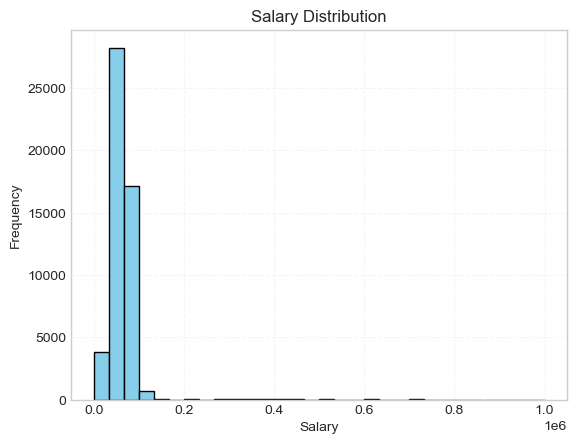

In [14]:
# Create a histogram of the salary distribution
plt.hist(df_interviews_salary['salary_processed'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.2)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.style.use('seaborn-whitegrid')
plt.show()
